<a href="https://colab.research.google.com/github/iamgsshetty/image_classification/blob/main/mini_proj_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install bing-image-downloader


In [3]:
!pip install ipython-autotime
%load_ext autotime

time: 187 µs (started: 2021-04-30 14:15:51 +00:00)


In [4]:
!mkdir images


mkdir: cannot create directory ‘images’: File exists
time: 119 ms (started: 2021-04-30 14:15:56 +00:00)


In [32]:
# import shutil
# shutil.rmtree("/content/images/sniper")

time: 10.9 ms (started: 2021-04-30 12:07:29 +00:00)


In [5]:
from bing_image_downloader import downloader as dwn
dwn.download("german shepherd",limit=100,output_dir="images")



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from http://www.recreoviral.com/wp-content/uploads/2015/08/Fotografías-de-perros-con-sus-cachorros-20.jpg
[!] Issue getting: http://www.recreoviral.com/wp-content/uploads/2015/08/Fotografías-de-perros-con-sus-cachorros-20.jpg
[!] Error:: 'ascii' codec can't encode character '\xed' in position 40: ordinal not in range(128)
[%] Downloading Image #1 from https://i.pinimg.com/736x/59/19/b2/5919b26e5a69cb7b7783aa5f2e586d25--white-shepherd-white-german-shepherds.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/980x.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/09/0086c45e7c47438e514092e4b936c1ef.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/GSD-12.jpg
[

In [34]:
dwn.download("pomeriann",limit=100,output_dir="images")
dwn.download("pitbull",limit=100,output_dir="images")
dwn.download("great dane",limit=100,output_dir="images")



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://www.mostwatchedtoday.com/wp-content/uploads/2014/05/pomeranian-haircut.jpg
[!] Issue getting: https://www.mostwatchedtoday.com/wp-content/uploads/2014/05/pomeranian-haircut.jpg
[!] Error:: <urlopen error [Errno -3] Temporary failure in name resolution>
[%] Downloading Image #1 from https://www.newslinq.com/wp-content/uploads/2016/08/cutest-puppies-in-the-world-6.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://2.bp.blogspot.com/-2Smv7xYWoTE/UN7yZrRUs5I/AAAAAAAAAMg/R820KqzoN90/s1600/385641_10151189511393254_353565466_n.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.ytimg.com/vi/YdWXnsgBpdM/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://i1.ytimg.com/vi/71Vv7VZpJms/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://s6004.pcdn.co/wp-content/uploads/2015/04/63930a9849258053aaa92dda0776ef47.jpg
[%] File 

In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

time: 596 ms (started: 2021-04-30 14:16:44 +00:00)


In [7]:
target=[]
image=[]
flat_data=[]

DATADIR="/content/images"
categories=["german shepherd","great dane","pitbull","pomeriann"]

for c in categories:
  class_num=categories.index(c)
  path=os.path.join(DATADIR,c)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resize=resize(img_array,(150,150,3))
    flat_data.append(img_resize.flatten())
    image.append(img_resize)
    target.append(class_num)

flat_data=np.array(flat_data)
image=np.array(image)
target=np.array(target)



time: 59.8 s (started: 2021-04-30 14:16:48 +00:00)


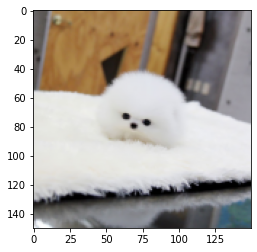

time: 203 ms (started: 2021-04-30 14:18:00 +00:00)


In [8]:
plt.imshow(image[360])

In [9]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(flat_data,target,test_size=0.3,random_state=111)

time: 130 ms (started: 2021-04-30 14:18:07 +00:00)


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
            #{'C':[1,10,100,1000],'gamma':[0.01,0.001],'kernel':['rbf']},
            #{'C':[1,10,100,1000],'gamma':[0.1,0.01],'kernel':['rbf'],'degree':[1,2,3]},
]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 12min 35s (started: 2021-04-30 14:18:18 +00:00)


In [11]:
y_pred=clf.predict(x_test)


time: 1.08 s (started: 2021-04-30 14:41:56 +00:00)


In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix

confusion_matrix(y_pred,y_test)

array([[31,  0,  0,  0],
       [ 1, 33,  3,  3],
       [ 0,  1, 22,  0],
       [ 0,  0,  0, 26]])

time: 10.4 ms (started: 2021-04-30 14:42:02 +00:00)


In [13]:
accuracy_score(y_pred,y_test)

0.9333333333333333

time: 4.6 ms (started: 2021-04-30 14:42:08 +00:00)


In [14]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 97.2 ms (started: 2021-04-30 14:42:19 +00:00)


In [15]:
model=pickle.load(open('img_model.p','rb'))

time: 23.9 ms (started: 2021-04-30 14:42:29 +00:00)


enetr urlhttps://kc-media-cdn-live.azureedge.net/cache/2/4/a/5/2/b/24a52bbb02d28806ed8856acd31434ab8b1a8508.jpg
Predicted category is : great dane


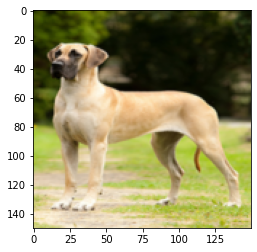

time: 4.67 s (started: 2021-04-30 14:45:18 +00:00)


In [19]:
fl_data=[]
url=input("enetr url")
img=imread(url)
img_resized=resize(img,(150,150,3))
fl_data.append(img_resized.flatten())
fl_data=np.array(fl_data)
plt.imshow(img_resized)
y_out=model.predict(fl_data)
y_out=categories[y_out[0]]
print(f'Predicted category is : {y_out}')
